In [1]:
from sklearn.neural_network import MLPClassifier
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import sys
import os

In [2]:
def get_fft(path):
    fs, data = wavfile.read(path) # load the data
    data = data.T[0].T
    x = range(len(data))
    plt.plot(x, data)
    plt.show()
    a = data # this is a two channel soundtrack, I get the first track
    b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
    c = fft(b) # calculate fourier transform (complex numbers list)
    c = c/max(c)
    d = len(c)/2  # you only need half of the fft list (real signal symmetry)
    plt.semilogx(abs(c[20:15000]),'r')
    plt.show()
    fft_new = abs(c[20:15000])
    return fft_new

In [6]:
datas = []
words = []

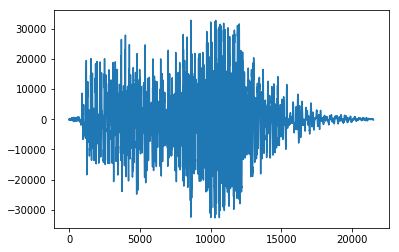

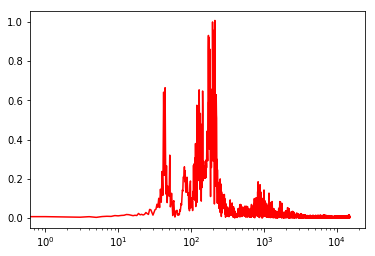

[0.00889732 0.00755764 0.00599618 ... 0.00320929 0.00316035 0.00275459]


In [12]:
path = 'record.wav' # name of record
command = 'python3 record_audio.py ' + path # command to mac os terminal which run a python file to record a file (1,5 sec record)
os.system(command) # run a command
new = get_fft(path) # get array with fourier tranform
print(new) 
datas.append(new) # add array to datas
words.append('hey') # add correct word to output array

In [9]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (100,40), random_state=1)
clf.fit(datas,words)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 40), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

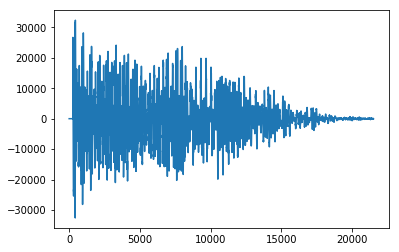

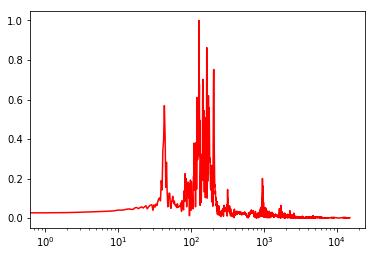

array(['hey'], dtype='<U3')

In [11]:
path = 'predict.wav'
command = 'python3 record_audio.py ' + path
os.system(command)
new = get_fft(path)
clf.predict([new])